In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import plot_helpers as ph
from plot_helpers import PlotDef, DataEntry

In [2]:
fairgp_files = [
    ('../results/eq_opp_varying_tpr_2018-09-12/propublica-recidivism_race_numerical-binsensitive.csv', 'Propublica (race)'),
    ('../results/eq_opp_varying_tpr_2018-09-12/propublica-recidivism_sex_numerical-binsensitive.csv', 'Propublica (gender)'),
]
def label_change(label):
    parts = label.split('_')
    #mode = parts[-1]
    in_True = parts[4] == "True"
    optional_star = "*" if in_True else ""
    return f"FairGPopp{optional_star}", in_True
    #return "average" if mode == "True" else mode, True

def filter_algos(label):
    return "tnr" not in label

fairgp = ph.parse_all(fairgp_files, filter_algos, mapping=label_change)

In [3]:
baseline_files = [
    ('../results/eq_opp_propublic_2018-08-28/propublica-recidivism_race_baseline.csv', 'Propublica (race)'),
    ('../results/eq_opp_propublic_2018-08-28/propublica-recidivism_sex_baseline.csv', 'Propublica (gender)'),
]
def label_change(label):
    return label, True

def filter_algos(label):
    algos = [
        'ZafarEqOpp',
        'SVM',
        'GP',
        #'DecisionTree',
    ]
    return label in algos

baselines = ph.parse_all(baseline_files, filter_algos, mapping=label_change)

In [4]:
data = ph.merge_plot_defs(fairgp, baselines)

In [5]:
#data = ph.reorder_entries(data, [0, 1, 2, 3, 4, 5])

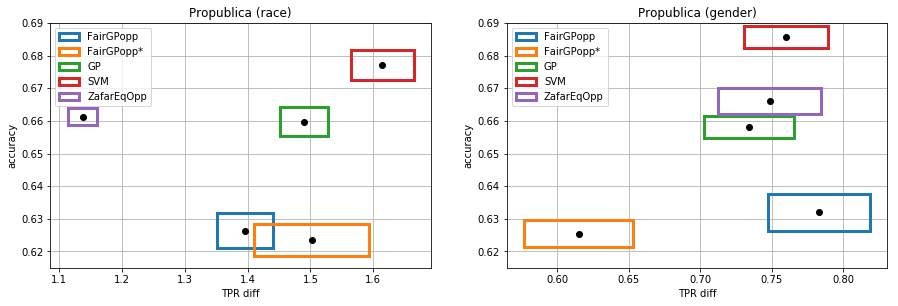

In [14]:
yaxis = ('accuracy', 'accuracy')
fig, plots = plt.subplots(ncols=2, figsize=(15, 4.5))
ph.errorbox(plots[0], data[0], ('race-TPRRatio', 'TPR diff'), yaxis)
#plots[0].set_xlim(1.0, 1.25)
ph.errorbox(plots[1], data[1], ('sex-TPRRatio', 'TPR diff'), yaxis)
#plots[1].set_xlim(.75, 1.)
for plot in plots:
    plot.set_ylim(0.615, 0.69)
#fig.savefig('dempar_vary_beta.eps', bbox_inches='tight')